In [336]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn as sk


In [2]:
def load_data():
    csv_path = 'datasets/uber.csv'
    return pd.read_csv(csv_path)

In [325]:
uber = load_data()
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


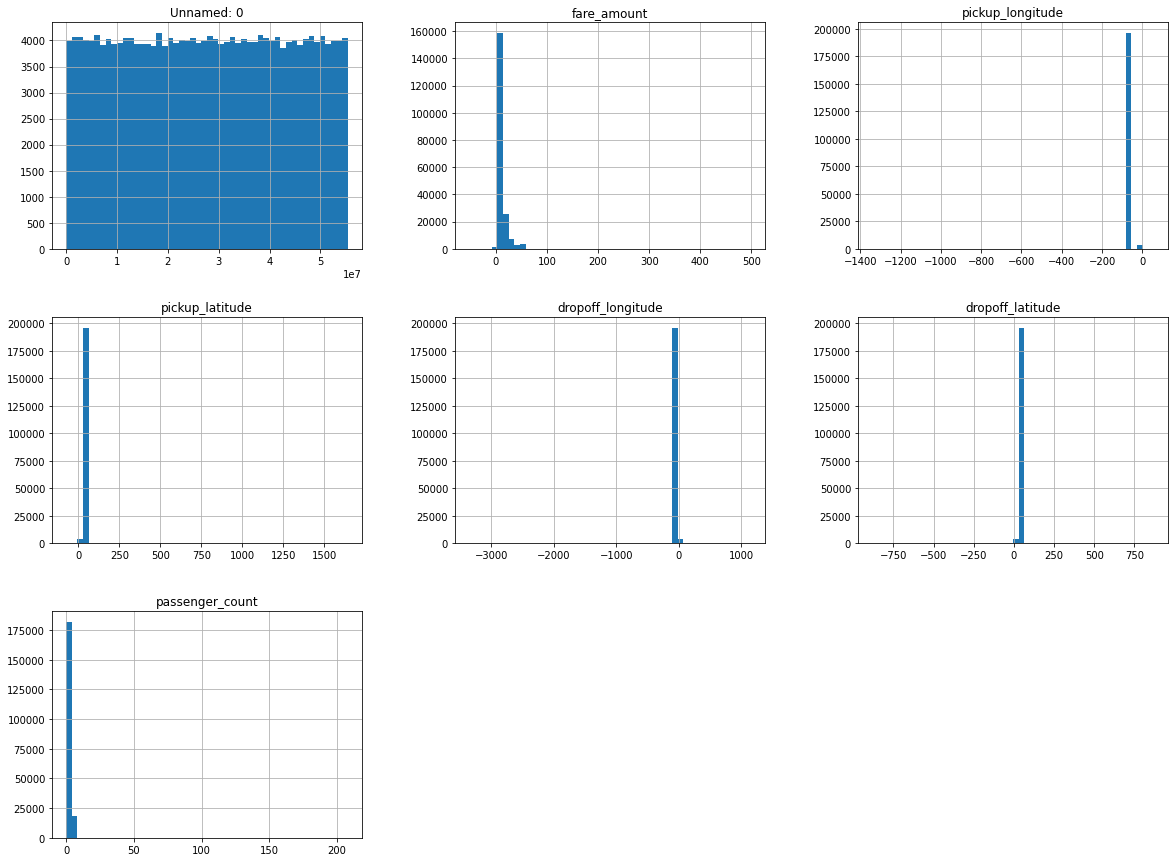

In [5]:
uber.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(uber, test_size=0.2, random_state=42)

In [292]:
print(train_set.shape)
print(test_set.shape)

(160000, 9)
(40000, 9)


In [7]:
test_set.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
119737,187972,2014-12-08 23:26:00.000000157,5.5,2014-12-08 23:26:00 UTC,-74.000458,40.723990,-73.989682,40.725797,1
72272,4242034,2012-09-02 21:54:00.00000059,45.0,2012-09-02 21:54:00 UTC,0.000000,0.000000,0.000000,0.000000,5
158154,42897898,2010-06-24 18:11:00.00000028,5.3,2010-06-24 18:11:00 UTC,-73.955315,40.779068,-73.970558,40.764650,5
65426,16700122,2012-11-14 20:58:04.0000006,32.3,2012-11-14 20:58:04 UTC,-73.870920,40.773705,-73.964346,40.797100,3
30074,13592810,2011-09-19 08:02:00.00000052,4.1,2011-09-19 08:02:00 UTC,-73.992195,40.748958,-73.987078,40.743065,1


In [206]:
uber = train_set.copy()

<AxesSubplot:xlabel='pickup_latitude', ylabel='pickup_longitude'>

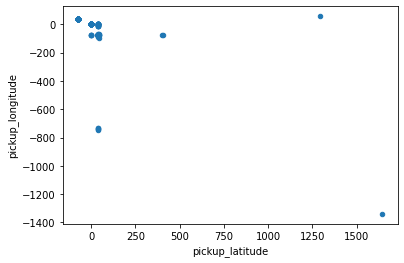

In [12]:
uber.plot(kind='scatter', x='pickup_latitude', y='pickup_longitude')

<AxesSubplot:xlabel='dropoff_latitude', ylabel='dropoff_longitude'>

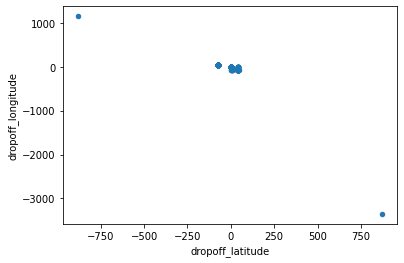

In [13]:
uber.plot(kind='scatter', x='dropoff_latitude', y='dropoff_longitude')

In [14]:
uber.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000563,0.001507,-0.001590,0.001042,-0.001185,0.002683
fare_amount,0.000563,1.000000,0.008559,-0.006856,0.006810,-0.009108,0.009384
pickup_longitude,0.001507,0.008559,1.000000,-0.800103,0.830801,-0.849639,-0.001232
pickup_latitude,-0.001590,-0.006856,-0.800103,1.000000,-0.758015,0.671587,-0.001532
dropoff_longitude,0.001042,0.006810,0.830801,-0.758015,1.000000,-0.927048,-0.000346
dropoff_latitude,-0.001185,-0.009108,-0.849639,0.671587,-0.927048,1.000000,-0.000776
passenger_count,0.002683,0.009384,-0.001232,-0.001532,-0.000346,-0.000776,1.000000


In [255]:
uber = train_set
uber_labels = train_set['fare_amount'].copy()

### Cleaning Data

In [20]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [295]:
def cleanData(X):
    X = X.dropna()
    X.drop(X[X['pickup_latitude'] > 90].index, inplace=True)
    X.drop(X[X['pickup_latitude'] < -90].index, inplace=True)
    X.drop(X[X['pickup_longitude'] > 180].index, inplace=True)
    X.drop(X[X['pickup_longitude'] < -180].index, inplace=True)
    X.drop(X[X['dropoff_latitude'] > 90].index, inplace=True)
    X.drop(X[X['dropoff_latitude'] < -90].index, inplace=True)
    X.drop(X[X['dropoff_longitude'] > 180].index, inplace=True)
    X.drop(X[X['dropoff_longitude'] < -180].index, inplace=True)
    return X

In [258]:
uber_labels = uber['fare_amount'].copy()

In [259]:
uber.drop('fare_amount', axis=1, inplace=True)

/var/folders/6j/zq70vzjs0ggcjv4q8z1llhmm0000gn/T/ipykernel_60419/1414010106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber.drop('fare_amount', axis=1, inplace=True)


In [35]:
uber.shape

(159999, 9)

### One Hot Encoding

In [200]:
uber['date'] = pd.to_datetime(uber['pickup_datetime'])
uber['day'] = uber['date'].dt.dayofweek
uber['hour'] = uber['date'].dt.hour

In [202]:
uber['weekend'] = uber['day'].apply(lambda x: 'yes' if x in [5,6] else 'no')

In [207]:
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
153248,17778666,2009-11-19 21:59:00.00000086,12.1,2009-11-19 21:59:00 UTC,-73.978585,40.748388,-73.976913,40.784958,1
67802,54334677,2013-02-27 22:29:15.0000004,32.5,2013-02-27 22:29:15 UTC,-73.978198,40.752533,-73.909752,40.874372,1
148889,11815656,2014-06-01 08:48:00.00000094,6.0,2014-06-01 08:48:00 UTC,-73.994242,40.751227,-73.999432,40.762037,1
103093,28734805,2010-07-10 23:10:00.00000019,15.3,2010-07-10 23:10:00 UTC,-73.951705,40.778330,-73.956050,40.777560,2
104681,54482655,2013-09-29 13:36:00.000000167,52.0,2013-09-29 13:36:00 UTC,-73.989120,40.736932,-73.782890,40.643947,1


In [205]:
from sklearn.preprocessing import OneHotEncoder
weekend_cat = uber[['weekend']]
cat_encoder = OneHotEncoder()
weekend_encoded = cat_encoder.fit_transform(weekend_cat).toarray()
weekend_encoded

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

### Custom Transformer

In [211]:
uber.head()

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
153248,17778666,2009-11-19 21:59:00.00000086,2009-11-19 21:59:00 UTC,-73.978585,40.748388,-73.976913,40.784958,1
67802,54334677,2013-02-27 22:29:15.0000004,2013-02-27 22:29:15 UTC,-73.978198,40.752533,-73.909752,40.874372,1
148889,11815656,2014-06-01 08:48:00.00000094,2014-06-01 08:48:00 UTC,-73.994242,40.751227,-73.999432,40.762037,1
103093,28734805,2010-07-10 23:10:00.00000019,2010-07-10 23:10:00 UTC,-73.951705,40.778330,-73.956050,40.777560,2
104681,54482655,2013-09-29 13:36:00.000000167,2013-09-29 13:36:00 UTC,-73.989120,40.736932,-73.782890,40.643947,1


In [188]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self._feature_names ] 

In [320]:
from sklearn.base import BaseEstimator, TransformerMixin
import geopy.distance as gd

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_weekends=True, cyclic_time=True):
        self.add_weekends = add_weekends
        self.cyclic_time = cyclic_time
    def fit(self, X, y=None):
        return self
    def distance(self, lat1, lon1, lat2, lon2):
        return gd.distance((lat1, lon1), (lat2, lon2)).mi
    def transform(self, X, y=None):
        # data cleaning
        X = X.dropna()
        X.drop(X[X['pickup_latitude'] > 90].index, inplace=True)
        X.drop(X[X['pickup_latitude'] < -90].index, inplace=True)
        X.drop(X[X['pickup_longitude'] > 180].index, inplace=True)
        X.drop(X[X['pickup_longitude'] < -180].index, inplace=True)
        X.drop(X[X['dropoff_latitude'] > 90].index, inplace=True)
        X.drop(X[X['dropoff_latitude'] < -90].index, inplace=True)
        X.drop(X[X['dropoff_longitude'] > 180].index, inplace=True)
        X.drop(X[X['dropoff_longitude'] < -180].index, inplace=True)
        # add hours and weekends
        X['distance_mi'] = X.apply(lambda row: self.distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
        X['date'] = pd.to_datetime(X['pickup_datetime'])
        X['day'] = X['date'].dt.dayofweek
        X['hour'] = X['date'].dt.hour
        if(self.add_weekends):
            X['weekend'] = X['day'].apply(lambda x: 1 if x in [5,6] else 0)
        if(self.cyclic_time):
            X['hour_sin'] = np.sin(2*np.pi*X['hour']/24)
            X['hour_cos'] = np.cos(2*np.pi*X['hour']/24)
        X.drop(['pickup_datetime', 'date', 'day', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1, inplace=True)
        return X.values

### Transform pipeline

In [321]:
from sklearn.pipeline import Pipeline
cat_attributes = ['weekend']
cols = ['pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count']
transform_pipeline = Pipeline(steps=[
    ('columns selector', FeatureSelector(cols)),
       ('custom transformer', CustomTransformer(add_weekends=True, cyclic_time=True))])

In [318]:
prepared_data = transform_pipeline.fit_transform(uber)

In [319]:
prepared_data

array([[ 1.        ,  2.52496014, 21.        ,  0.        , -0.70710678,
         0.70710678],
       [ 1.        ,  9.14107712, 22.        ,  0.        , -0.5       ,
         0.8660254 ],
       [ 1.        ,  0.7940764 ,  8.        ,  1.        ,  0.8660254 ,
        -0.5       ],
       ...,
       [ 1.        ,  1.7404855 , 13.        ,  1.        , -0.25881905,
        -0.96592583],
       [ 5.        ,  0.61762778, 19.        ,  0.        , -0.96592583,
         0.25881905],
       [ 2.        ,  1.87409437,  9.        ,  1.        ,  0.70710678,
        -0.70710678]])

### Linear Regression

In [260]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_data, uber_labels)

LinearRegression()

In [264]:
some_data = uber.iloc[:5]
some_labels = uber_labels.iloc[:5]
some_data_prepared = transform_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

        passenger_count  distance_mi  hour  weekend  hour_sin  hour_cos
153248                1     2.524960    21        0 -0.707107  0.707107
67802                 1     9.141077    22        0 -0.500000  0.866025
148889                1     0.794076     8        1  0.866025 -0.500000
103093                2     0.234025    23        1 -0.258819  0.965926
104681                1    12.589486    13        1 -0.258819 -0.965926
<class 'numpy.ndarray'>
Predictions: [11.08944289 11.064062   11.42040281 11.05807565 11.25535426]


In [265]:
print('Labels: ', list(some_labels))

Labels:  [12.1, 32.5, 6.0, 15.3, 52.0]


### Mean Squared Error

In [266]:
from sklearn.metrics import mean_squared_error

uber_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(uber_labels, uber_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.79115142332046

#### Mean Absolute Error

In [269]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(uber_labels, uber_predictions)
lin_mae

6.023829793519502

### Decision Tree Regression

In [270]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(prepared_data, uber_labels)

DecisionTreeRegressor(random_state=42)

In [271]:
uber_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(uber_labels, uber_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.1396877977095756

### k-fold cross Validation

In [272]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, prepared_data, uber_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [273]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [7.39641713 6.29963515 6.78587942 6.4688725  6.76500174 6.40713228
 6.54561148 6.706662   6.91677134 6.31631911]
Mean: 6.660830215269638
Standard deviation: 0.31604098949692344


In [274]:
lin_scores = cross_val_score(lin_reg, prepared_data, uber_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [10.20464933  9.4786644   9.7800398   9.49833817  9.98878978  9.83909456
  9.85109201  9.801485    9.81650057  9.63590659]
Mean: 9.789456020049384
Standard deviation: 0.2059770966955579


### Random Forest Regressor

In [275]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(prepared_data, uber_labels)

RandomForestRegressor(random_state=42)

In [276]:
uber_predictions = forest_reg.predict(prepared_data)
forest_mse = mean_squared_error(uber_labels, uber_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.7936063081934366

### Grid Search

In [287]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'max_depth': [8, 10, 12], 'max_features': [2, 4, 6, 8]},
  ]

descision_tree_reg = DecisionTreeRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(descision_tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(prepared_data, uber_labels)

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [8, 10, 12],
                          'max_features': [2, 4, 6, 8]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [288]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 6}

In [289]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=8, max_features=6, random_state=42)

In [290]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

6.335880136634358 {'max_depth': 8, 'max_features': 2}
5.0821535994430365 {'max_depth': 8, 'max_features': 4}
5.0589181326279276 {'max_depth': 8, 'max_features': 6}
nan {'max_depth': 8, 'max_features': 8}
5.989829350787275 {'max_depth': 10, 'max_features': 2}
5.130166967890694 {'max_depth': 10, 'max_features': 4}
5.209896149998741 {'max_depth': 10, 'max_features': 6}
nan {'max_depth': 10, 'max_features': 8}
5.639575137425948 {'max_depth': 12, 'max_features': 2}
5.4312305601740665 {'max_depth': 12, 'max_features': 4}
5.458991776923341 {'max_depth': 12, 'max_features': 6}
nan {'max_depth': 12, 'max_features': 8}


In [291]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.47272889e-04, 9.83352881e-01, 3.07535887e-03, 2.00428907e-03,
       2.77988878e-03, 8.24030935e-03])

### Evaluate on Test Set

In [297]:
test_set = cleanData(test_set)

In [ ]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("fare_amount", axis=1)
y_test = test_set["fare_amount"].copy()

X_test_prepared = transform_pipeline.fit_transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [299]:
final_rmse

5.937265878785344

In [300]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([4.80305095, 6.88715862])

### Full Pipeline in Action

In [322]:
full_pipeline = Pipeline( steps = [ ( 'transform_pip', transform_pipeline),  ( 'model', DecisionTreeRegressor(random_state=42) ) ] )

In [ ]:
clean_data = cleanData(uber)
X = clean_data.drop("fare_amount", axis=1)
y = clean_data["fare_amount"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
full_pipeline.fit(X_train, y_train)
y_pred = full_pipeline.predict(X_test)


In [330]:
y_pred

array([ 4.5, 10. ,  4. , ..., 30.5,  5.7,  8.5])

In [335]:
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

8.160139128052194